<a href="https://colab.research.google.com/github/JuanFdoGf/MachineLearningProjects/blob/main/Titanic_Survival_Prediction_op2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True
sns.set(style='whitegrid')

In [11]:
path = kagglehub.dataset_download('yasserh/titanic-dataset')
df = pd.read_csv(f'{path}/Titanic-Dataset.csv')

## ANÁLISIS EXPLORATORIO INICIAL

=== Información Básica del Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

=== Resumen Estadístico ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838 

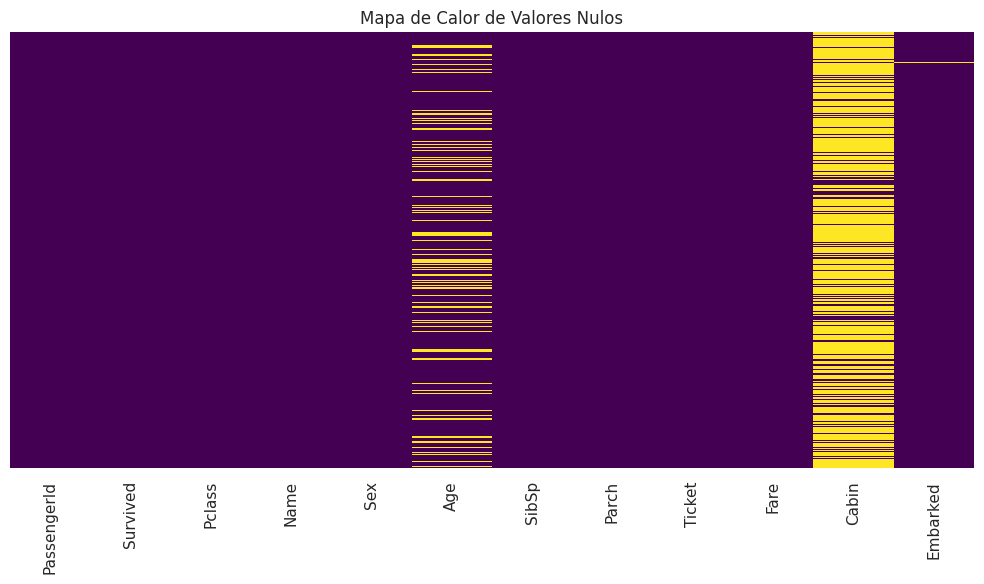

In [13]:
print('=== Información Básica del Dataset ===')
print(df.info())

print('\n=== Resumen Estadístico ===')
print(df.describe())

print('\n=== Valores Nulos ===')
null_percentages = df.isnull().mean() * 100
print(null_percentages[null_percentages > 0])

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos')
plt.tight_layout()
plt.show()

## ANÁLISIS DE VARIABLES CATEGÓRICAS

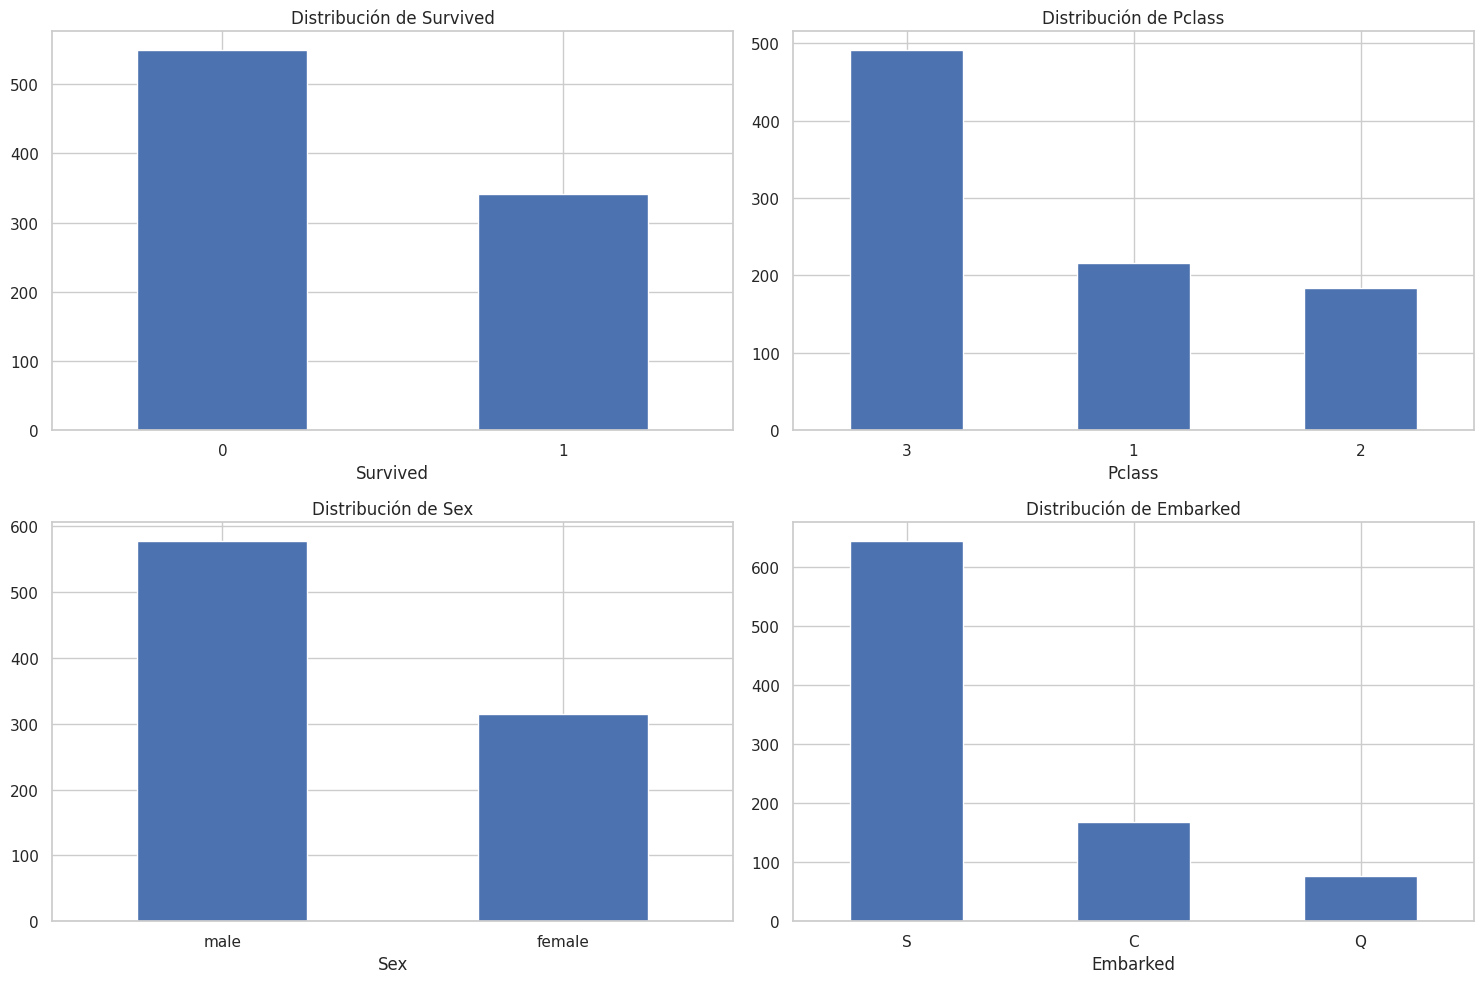

In [17]:
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## ANÁLISIS DE SUPERVIVENCIA

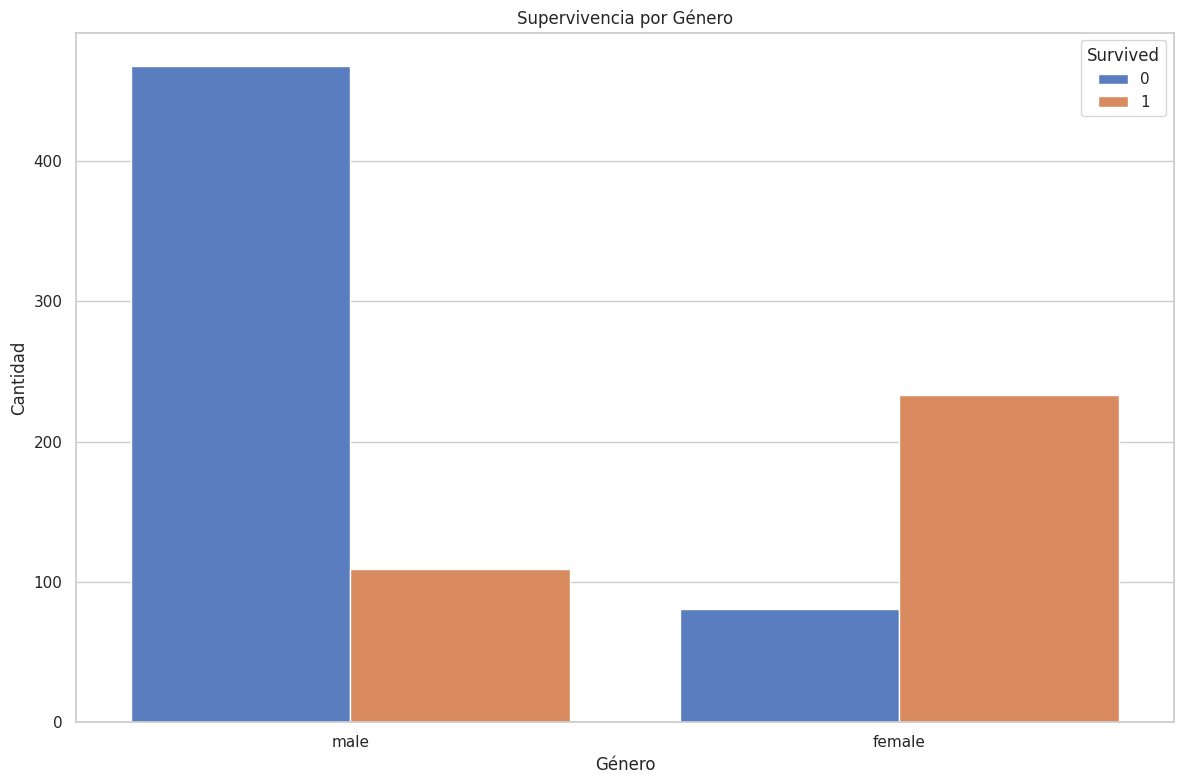

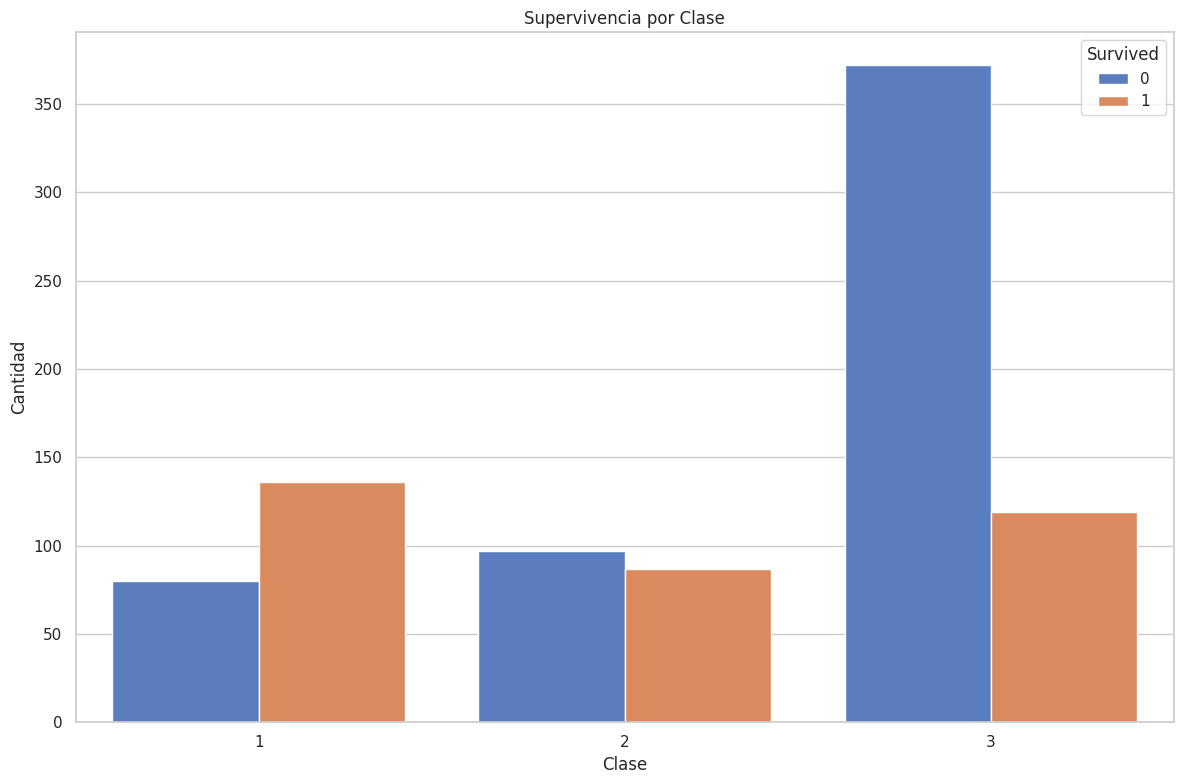

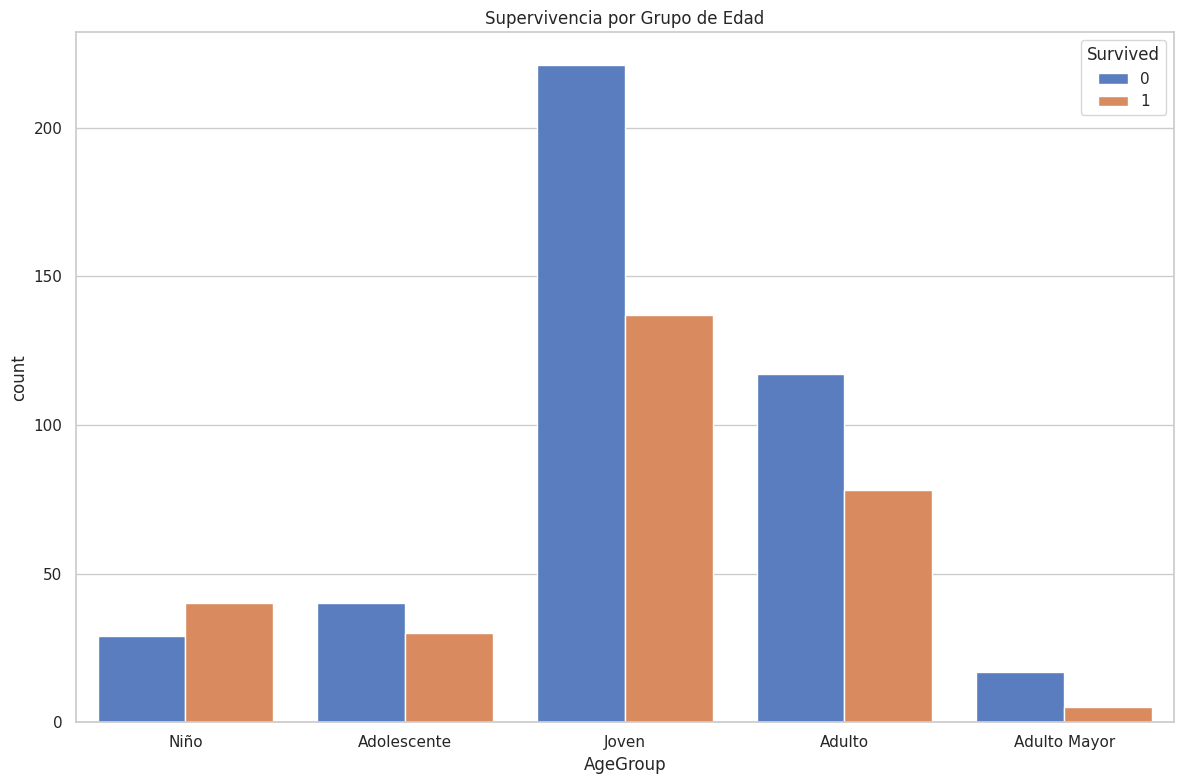

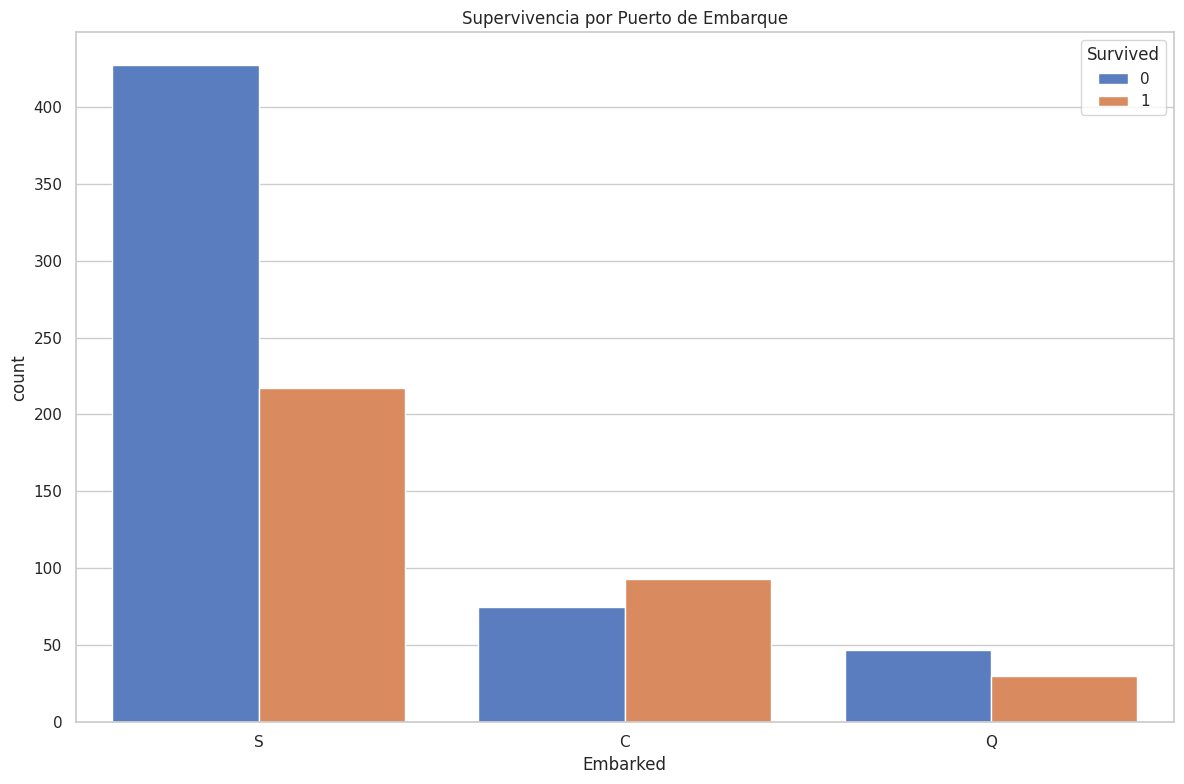

In [28]:
# Supervivencia por Genero
plt.figure(figsize=(12, 8))
#plt.subplot(1, 3, 1)
#df.groupby(['Sex', 'Survived'])['Survived'].count().unstack().plot(kind='bar', stacked=True)
sns.countplot(data=df, x='Sex', hue='Survived', palette='muted', dodge=True)
plt.title('Supervivencia por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

#Supervivencia por Clase
plt.figure(figsize=(12, 8))
#plt.subplot(1, 3, 2)
#df.groupby(['Pclass', 'Survived'])['Survived'].count().unstack().plot(kind='bar', stacked=True)
sns.countplot(data=df, x='Pclass', hue='Survived', palette='muted', dodge=True)
plt.title('Supervivencia por Clase')
plt.xlabel('Clase')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

# Supervivencia por Edad
plt.figure(figsize=(12, 8))
#plt.subplot(1, 3, 3)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Niño', 'Adolescente', 'Joven', 'Adulto', 'Adulto Mayor'])
#df.groupby(['AgeGroup', 'Survived'])['Survived'].count().unstack().plot(kind='bar', stacked=True)
sns.countplot(data=df, x='AgeGroup', hue='Survived', palette='muted', dodge=True)
plt.title('Supervivencia por Grupo de Edad')
plt.tight_layout()
plt.show()

# Supervivencia por Puerto de Embarque
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='muted', dodge=True)
plt.title('Supervivencia por Puerto de Embarque')
plt.tight_layout()
plt.show()

## TRATAMIENTO DE VALORES NULOS

In [39]:
print('\n=== Estrategia de Tratamiento de Valores Nulos ===')

# Análisis de Age
print('\nNulos en Edad:')
print(f'Porcentaje de nulos: {df["Age"].isnull().mean() * 100:.2f}%')
df['Age'] = df['Age'].fillna(df['Age'].median())

# Análisis de Embarked
print('\nNulos en Puerto de Embarque:')
print(f'Porcentaje de nulos: {df["Embarked"].isnull().mean() * 100:.2f}%')
most_common_embarked = df['Embarked'].mode()[0]
df.loc[:, 'Embarked'] = df['Embarked'].fillna(most_common_embarked)

# Análisis de Cabin
print('\nNulos en Cabina:')
print(f'Porcentaje de nulos: {df["Cabin"].isnull().mean() * 100:.2f}%')
df.loc[:, 'Cabin'] = df['Cabin'].fillna('Unknown')


=== Estrategia de Tratamiento de Valores Nulos ===

Nulos en Edad:
Porcentaje de nulos: 0.00%

Nulos en Puerto de Embarque:
Porcentaje de nulos: 0.00%

Nulos en Cabina:
Porcentaje de nulos: 0.00%
